# RBM-BB 


# RBM-BG (todo)

Bernoulli - Gaussian {-1,1}

\begin{align}
q_{v} (s_i) &= \frac{1}{2} (\delta_{s_i,-1} + \delta_{s_i,1}) \\
q_{h} (\tau_i) &= \frac{1}{\sqrt{2\pi \sigma_{h}^{2}}} \exp \left( - \frac{\tau_{a}^{2}}{2\sigma_{h}^2} \right)
\end{align}

\begin{align}
p(\tau | s) \propto \prod_{a} \exp \left( -\frac{\tau_{a}^2}{2\sigma_{h}^2} + \tau_a \sum_{i} w_{ia} s_i \right)
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
data_dir = '../../../paperstudy/RBM/datas/'

In [3]:
sys.path.append('../')
import RBM as rbm

## Load data

In [4]:
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open(mnist_test_data, 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
# number of data
print('number of training data', len(training_data_list))
print('number of test data', len(test_data_list))

number of training data 60000
number of test data 10000


## Preprocessing

In [6]:
n_data_train = 1000
n_data_val = 500
n_data_test = 500

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    x_train[i] = np.asfarray(data[1:])/255.
    
x_val = np.zeros((n_data_val, n_x))
for i, data in enumerate(training_data_list[n_data_train:n_data_train+n_data_val]):
    data = data.split(',')
    x_val[i] = np.asfarray(data[1:])/255.
    
x_test = np.zeros((n_data_test, n_x))
for i, data in enumerate(test_data_list[:n_data_test]):
    data = data.split(',')
    x_test[i] = np.asfarray(data[1:])/255.

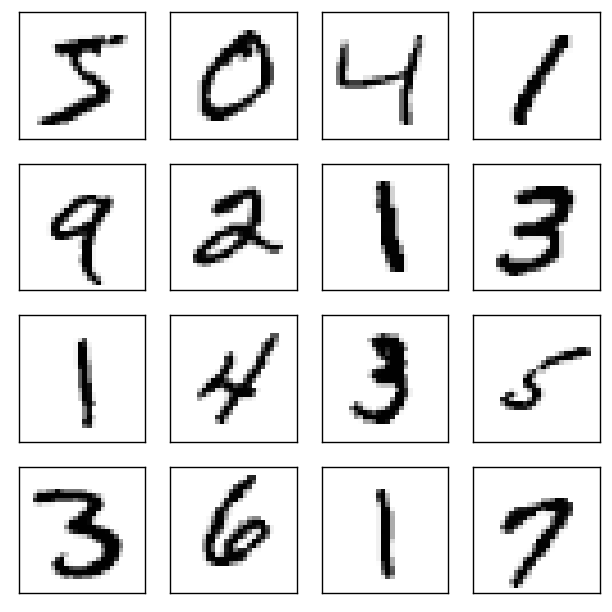

In [7]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [8]:
model = rbm.test.BBRBM(n_x,10)

In [9]:
model.fit(x_train,0.1,100)

0 0.4819123604343701
1 0.4732217892058785
2 0.4656021163367307
3 0.45741529160683875
4 0.4489843142158824
5 0.44091161013424995
6 0.43529315275129676
7 0.42880175619267324
8 0.4206561529513767
9 0.4142648864447739
10 0.40821552670087646
11 0.4018958488297282
12 0.39658045767326544
13 0.39048603990615854
14 0.38453214334753516
15 0.3780243252202843
16 0.3745755407064786
17 0.3686567882054783
18 0.36438007752120455
19 0.3599865701182434
20 0.35406139004621456
21 0.3501252405864308
22 0.3456102896060386
23 0.3411562129753862
24 0.3370503406264466
25 0.3331281067328892
26 0.3301577385856303
27 0.3258005907264867
28 0.32187618096258114
29 0.318299460274306
30 0.3138018712386916
31 0.30942916715705904
32 0.3037956637556982
33 0.2992874104543779
34 0.29268898608462995
35 0.28598675019027214
36 0.2779806177372909
37 0.27127185423188876
38 0.2644451935676231
39 0.25764787464005207
40 0.2512981997701042
41 0.2461131357444938
42 0.2410294272611004
43 0.2363138960486155
44 0.2318684328633415
45 0.

In [10]:
type(type(None))

type

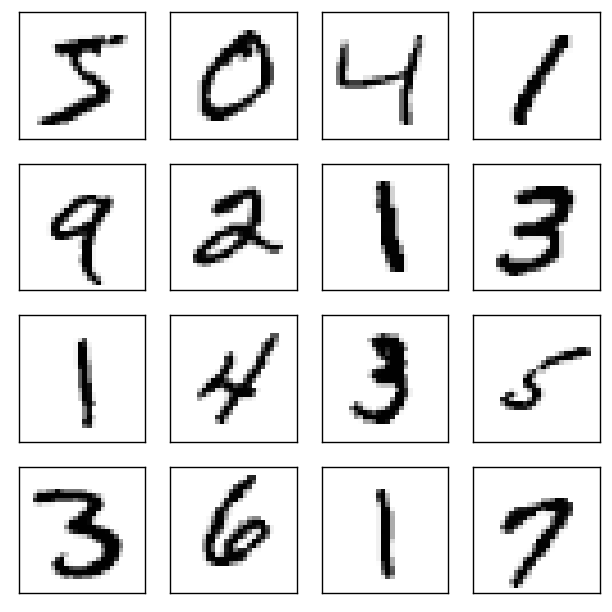

In [11]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

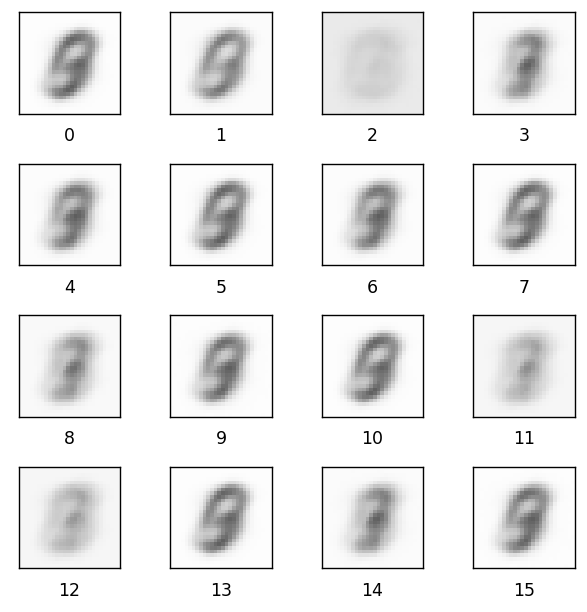

In [12]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [13]:
model.w.T[0].shape

(784,)

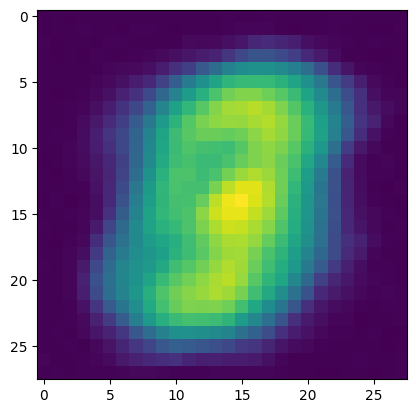

In [14]:
plt.imshow((hid[6]@model.w.T + model.a).reshape(28,28))

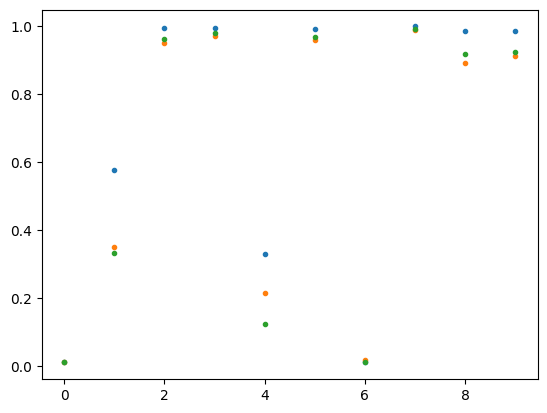

In [15]:
x = np.arange(10)
# plt.hist(hid[8])
plt.plot(x,hid[6],'.')
plt.plot(x,hid[8],'.')
plt.plot(x,hid[14],'.')

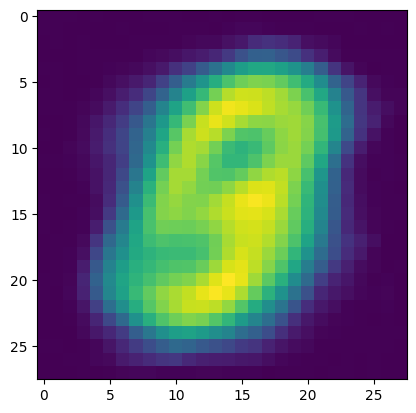

In [16]:
plt.imshow((hid[5]@model.w.T + model.a).reshape(28,28))

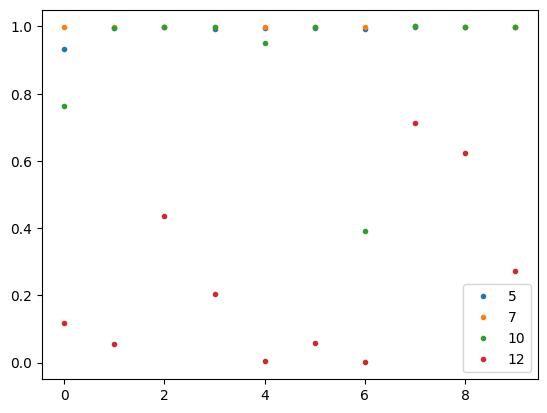

In [17]:
x = np.arange(10)
plt.plot(x,hid[5],'.',label='5')
plt.plot(x,hid[7],'.',label='7')
plt.plot(x,hid[10],'.',label='10')
plt.plot(x,hid[12],'.',label='12')
plt.legend()

In [18]:
model.w.shape

(784, 10)

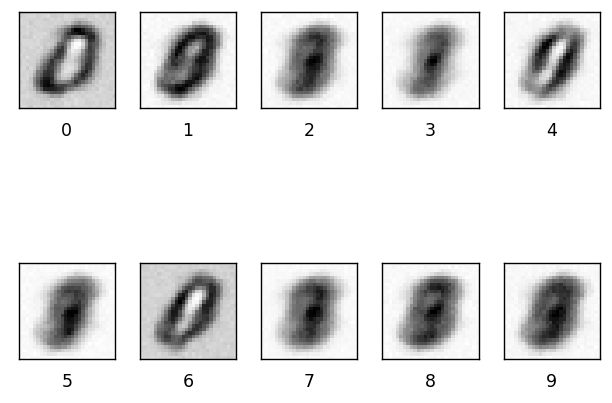

In [19]:
# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [28]:
np.log(784)

6.664409020350408

In [29]:
hid[0]

array([0.989764  , 0.99072239, 0.99676203, 0.96098095, 0.97630274,
       0.78065168, 0.97678861, 0.99338967, 0.97284397, 0.99113724])

In [30]:
model.w

array([[-0.26140432, -0.2886939 , -0.30919974, ..., -0.29664328,
        -0.24626959, -0.26980608],
       [-0.26769385, -0.29028944, -0.33957132, ..., -0.28328687,
        -0.23451528, -0.27079625],
       [-0.25808428, -0.31550397, -0.34075821, ..., -0.27582442,
        -0.24139437, -0.25566892],
       ...,
       [-0.24722531, -0.29672605, -0.32717579, ..., -0.2904616 ,
        -0.24484386, -0.2663051 ],
       [-0.25619332, -0.27953933, -0.34177627, ..., -0.29695594,
        -0.2435341 , -0.25997279],
       [-0.25079829, -0.27876849, -0.31460236, ..., -0.32027387,
        -0.24719585, -0.26124711]])

# Feature retrieving

0 0.48206495147078443
1 0.4737520263007163
2 0.46509899508823127
3 0.45793732542036436
4 0.4490527165768267


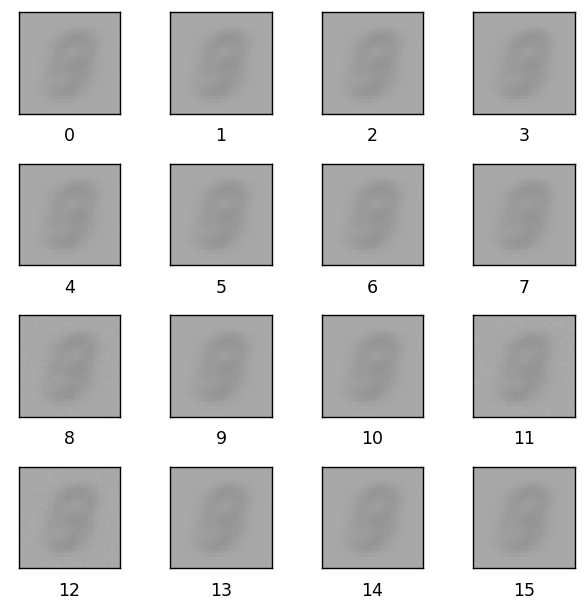

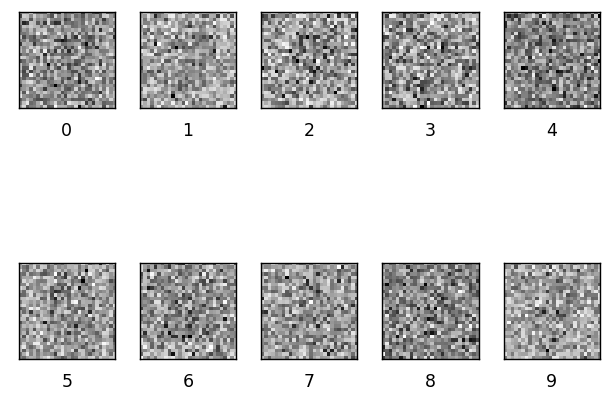

In [31]:
# Not trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,5)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

0 0.4815367301822688
1 0.47370733342356547
2 0.4657747403863505
3 0.45686418616466207
4 0.4499071833635414
5 0.4423415621150421
6 0.4345295273011165
7 0.4272221993699441
8 0.42126564674889544
9 0.41399121197498623
10 0.40877478540435785
11 0.4017553976492557
12 0.39591770257122455
13 0.3900364700782274
14 0.3851936729593798
15 0.3789384608745459
16 0.37420635303140853
17 0.3685371903663427
18 0.36481380601260116
19 0.35967950729311327
20 0.3556119902863105
21 0.3504005106944739
22 0.34517187924189274
23 0.3414748054123611
24 0.3375597643959545
25 0.33413136303541024
26 0.33032339985013615
27 0.3260126105344099
28 0.32304665415185674
29 0.319154442267103
30 0.31600757351960385
31 0.3120250755204043
32 0.30814664414785525
33 0.3038364800822289
34 0.2979432928073191
35 0.29331011953801134
36 0.2870063130154021
37 0.28029702429991604
38 0.2732893312226852
39 0.26739157211904363
40 0.2603897013707443
41 0.2533933728393318
42 0.24879066675689884
43 0.24357019856962392
44 0.23873462934193276


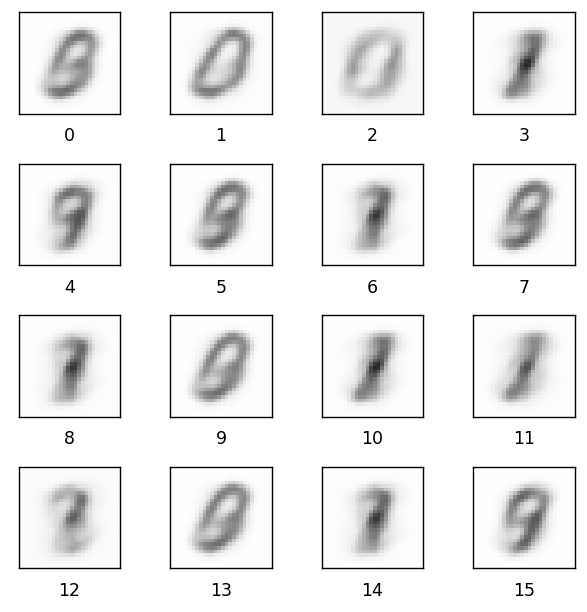

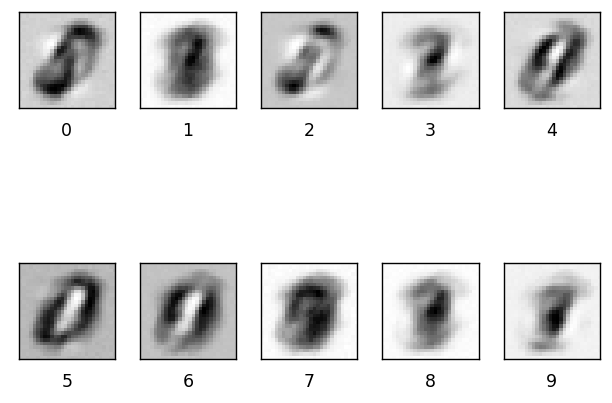

In [32]:
# Mid trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,200)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# Not all patterns are learned

In [33]:
# Well trained

n_h = 100

model = rbm.RBM(n_x,n_h)
model.fit(x_train,0.1,1000)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

0 0.48139457832152477
1 0.4728769062526972
2 0.46481288564445394
3 0.4571197834035574
4 0.4492337489897921
5 0.44072217435993993
6 0.4354388160166029
7 0.4272149714787876
8 0.4200126605544179
9 0.41436889804941573
10 0.4062102445880313
11 0.40105453230311744
12 0.3954019262607003
13 0.38893231841756315
14 0.3830939180574191
15 0.37713573478410983
16 0.372844018097435
17 0.36736505151080046
18 0.36189231741716293
19 0.3581466791618609
20 0.3530443582334893
21 0.3476286019309684
22 0.34397088384373353
23 0.33851945327150484
24 0.3344922774011565
25 0.3297631507504964
26 0.3258281117348901
27 0.32089085683292934
28 0.3158473394259664
29 0.30998094786934394
30 0.30432906711704283
31 0.2961900415067987
32 0.28849291265525817
33 0.2800479346640617
34 0.27173351889775527
35 0.26550374198699095
36 0.2581476595540178
37 0.252999555312321
38 0.24775283662484612
39 0.24170347187894758
40 0.2382555226992758
41 0.2342625455083994
42 0.2309496953683434
43 0.2270155567128812
44 0.2249479946880713
45 

351 0.08979063174289321
352 0.08955637804141263
353 0.08936159512824733
354 0.08973302870167674
355 0.08989632902180476
356 0.08950967936194086
357 0.08936601689695481
358 0.08937060373168877
359 0.08932094386774317
360 0.08872374498819131
361 0.08931784262724697
362 0.08866199028631061
363 0.08898792065845947
364 0.08900965435193685
365 0.08873855591256109
366 0.0882039870850301
367 0.08788515955401772
368 0.08861110993416975
369 0.08852197928190889
370 0.08870209632872757
371 0.08851577179891562
372 0.08817785163084847
373 0.08794632902180478
374 0.08814311773729104
375 0.08813614494817534
376 0.08788792065845949
377 0.08732332482012414
378 0.0876305977292878
379 0.08772315475209692
380 0.08738461433593044
381 0.08712216435593846
382 0.08773042265925979
383 0.08733926619667474
384 0.08688151809743505
385 0.0874492701982754
386 0.08674029660883958
387 0.08739365295137665
388 0.08703462934193286
389 0.08672439524829538
390 0.08674699428791122
391 0.08664075179091245
392 0.0863290271010

695 0.0706195783215247
696 0.07048539965005608
697 0.07060401209503409
698 0.07049698428390966
699 0.07046711233513014
700 0.07049896007422578
701 0.0708120202983154
702 0.07027877700099647
703 0.07017925219107252
704 0.07101978340355748


KeyboardInterrupt: 

In [10]:
model.w

array([[-0.07994977, -0.0633587 , -0.24946978, ..., -0.1663789 ,
        -0.23160963, -0.08529326],
       [-0.11559113, -0.06793313, -0.26091464, ..., -0.17663907,
        -0.22760558, -0.07782317],
       [-0.08748472, -0.04456835, -0.24086916, ..., -0.19919881,
        -0.24164989, -0.08572561],
       ...,
       [-0.08628872, -0.06605983, -0.25993903, ..., -0.1913698 ,
        -0.22735157, -0.08622302],
       [-0.1034634 , -0.04872091, -0.24118429, ..., -0.19791907,
        -0.23320401, -0.09409507],
       [-0.09060356, -0.06098513, -0.26663824, ..., -0.18090931,
        -0.21843992, -0.09653035]])

In [11]:
np.sum(np.abs(model.w) > 1e-4)

78382

In [12]:
np.sum(np.abs(model.w) > 0)

78400

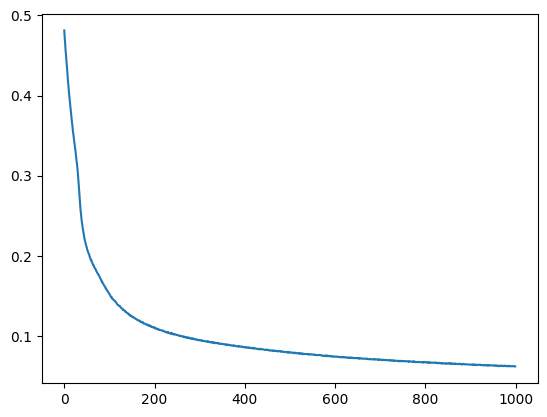

In [13]:
plt.plot(np.arange(len(model.history['loss'])), model.history['loss'])

In [14]:
w_hist = np.array(model.history['w'])

In [15]:
w_hist.shape

(1000, 784, 100)

In [16]:
w_hist[0]

array([[ 0.01130334, -0.00758659,  0.00168789, ...,  0.01303615,
         0.00693724,  0.00084185],
       [-0.02428069, -0.01178706, -0.0076506 , ...,  0.00327735,
         0.01079242,  0.00881114],
       [ 0.00407973,  0.01110997,  0.00994235, ..., -0.02097348,
        -0.00427838,  0.00118743],
       ...,
       [ 0.00530186, -0.00997079, -0.00509468, ..., -0.01195172,
         0.01089888,  0.00037854],
       [-0.01251795,  0.00709098,  0.00996699, ..., -0.01934506,
         0.00307581, -0.00791366],
       [ 0.0025703 , -0.00461007, -0.01179112, ...,  0.00182835,
         0.02282073, -0.0096802 ]])

In [17]:
w_hist[-1]

array([[-0.07994977, -0.0633587 , -0.24946978, ..., -0.1663789 ,
        -0.23160963, -0.08529326],
       [-0.11559113, -0.06793313, -0.26091464, ..., -0.17663907,
        -0.22760558, -0.07782317],
       [-0.08748472, -0.04456835, -0.24086916, ..., -0.19919881,
        -0.24164989, -0.08572561],
       ...,
       [-0.08628872, -0.06605983, -0.25993903, ..., -0.1913698 ,
        -0.22735157, -0.08622302],
       [-0.1034634 , -0.04872091, -0.24118429, ..., -0.19791907,
        -0.23320401, -0.09409507],
       [-0.09060356, -0.06098513, -0.26663824, ..., -0.18090931,
        -0.21843992, -0.09653035]])

In [18]:
s_hist = np.zeros((1000,n_h))
for i in range(1000):
    _, s, _ = np.linalg.svd(w_hist[i])
#     print(s)
    s_hist[i] = s.copy()

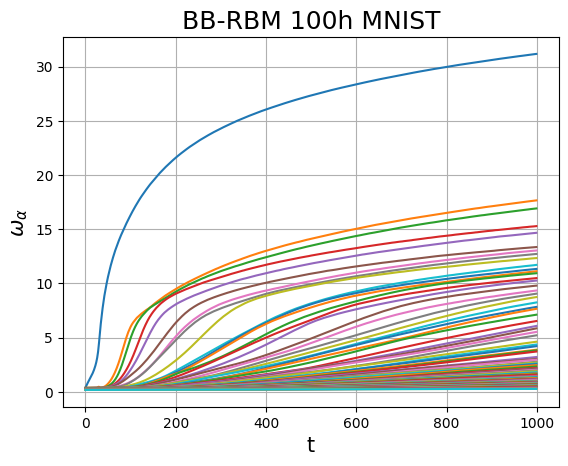

In [25]:
for i in range(n_h):
    plt.plot(s_hist.T[i], label=str(i))
# plt.legend()
plt.grid(True)
plt.ylabel(r'$\omega_{\alpha}$', fontsize=15)
plt.xlabel('t', fontsize=15)
plt.title('BB-RBM 100h MNIST', fontsize=18)
# plt.savefig('./figs/BB-RBM_100h_MNIST.jpg')

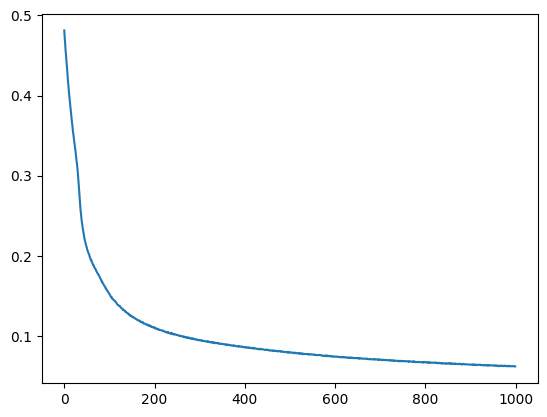

In [26]:
plt.plot(np.arange(len(model.history['loss'])), model.history['loss'])

In [35]:
import time

In [52]:
%timeit x = np.random.normal((1000))

680 ns ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [53]:
x = np.random.normal((100,1))

In [54]:
%timeit pow(x,2)

445 ns ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [55]:
%timeit x**2

405 ns ± 4.06 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [56]:
%timeit x*x

379 ns ± 2.79 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [57]:
%timeit x.T@x

934 ns ± 6.33 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [58]:
%timeit np.matmul(x,x)

871 ns ± 8.63 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [59]:
np.matmul(x,x)

10337.750546899082

In [69]:
class test():
    
    def f(self,x):
        a = 1
    
class test2(test):
    
    def f(self,x):
        super().f(x)
        b = 2
        return a

In [70]:
t = test2()

In [71]:
t.f(1)

NameError: name 'a' is not defined

In [72]:
def f():
    return 1,2,None, None

In [73]:
a, b = f()

ValueError: too many values to unpack (expected 2)